In [ ]:
pip install pandas scikit-learn numpy surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357272 sha256=05b056f32226ad1afb3c33ec0aec8eb2e02bc504c1781313c1999e78c00e518b
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv('/content/cleaned_combined_books_dataset.csv')

# Display first few rows of the dataset
print(df.head())

# Fill missing values if any
df.fillna('', inplace=True)


                                          Book Title             Course  \
0                          Operating System Concepts  Operating Systems   
1                           Modern Operating Systems  Operating Systems   
2  Operating Systems: Internals and Design Princi...  Operating Systems   
3                           Database System Concepts          Databases   
4                          Introduction to Databases          Databases   

                                   Branch  Rating Published Date  \
0  Computer Science and Engineering (CSE)    4.05     2019-12-13   
1  Computer Science and Engineering (CSE)    3.84     2022-01-11   
2  Computer Science and Engineering (CSE)    4.29     2020-07-25   
3  Computer Science and Engineering (CSE)    4.20     2017-06-10   
4  Computer Science and Engineering (CSE)    3.88     2020-02-21   

                                         Description  
0  This book covers fundamental concepts of moder...  
1  This book covers fundamenta

In [ ]:
print("Feature names in the dataset:")
print(df.columns)

Feature names in the dataset:
Index(['Book Title', 'Course', 'Branch', 'Rating', 'Published Date',
       'Description'],
      dtype='object')


In [ ]:
print("Shape of the dataset (rows, columns):")
print(df.shape)

Shape of the dataset (rows, columns):
(231, 6)


In [ ]:
print("\nData types of features:")
print(df.dtypes)


Data types of features:
Book Title         object
Course             object
Branch             object
Rating            float64
Published Date     object
Description        object
dtype: object


In [ ]:
print("Null values in each feature:")
print(df.isnull().sum())

Null values in each feature:
Book Title        0
Course            0
Branch            0
Rating            0
Published Date    0
Description       0
dtype: int64


In [ ]:
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


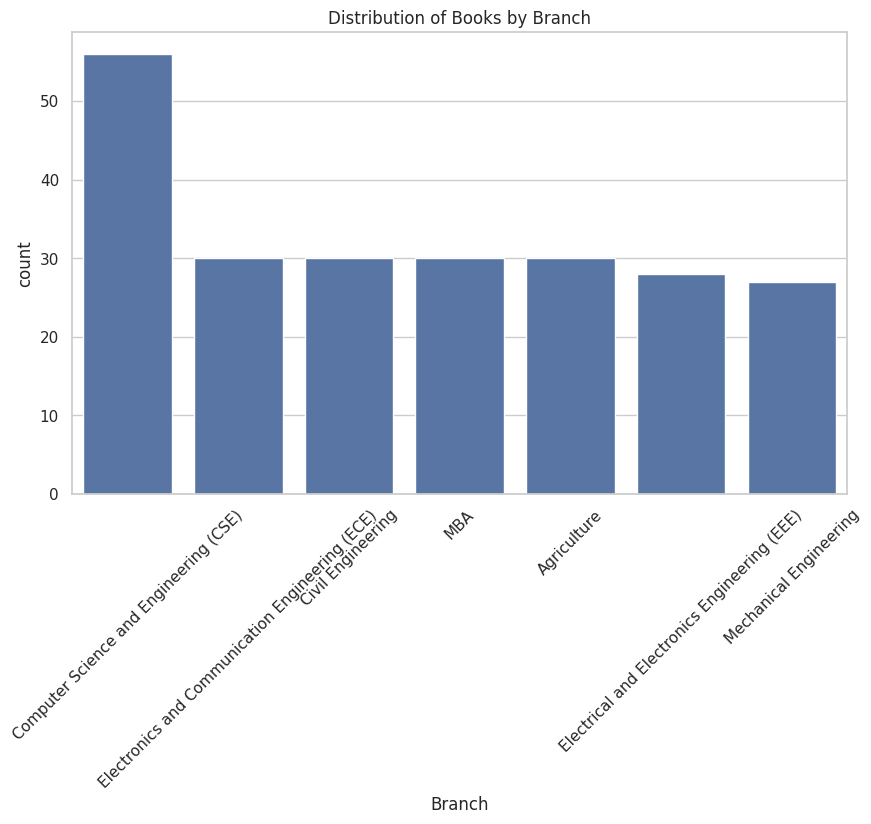

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set a style for seaborn
sns.set(style="whitegrid")

# 1. Bar Plot for Categorical Features (e.g., 'Branch')
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data=df, order=df['Branch'].value_counts().index)
plt.title('Distribution of Books by Branch')
plt.xticks(rotation=45)
plt.show()

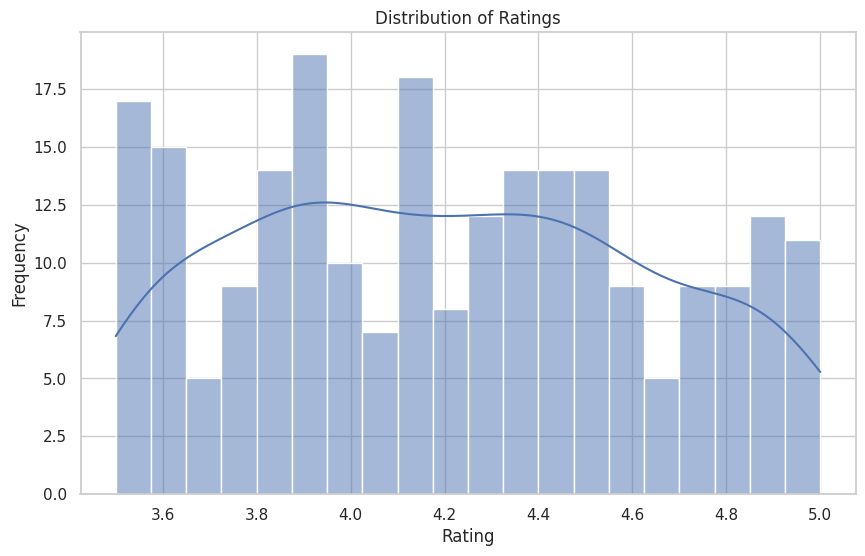

In [ ]:
# 2. Histogram for Numerical Features (e.g., 'Rating')
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

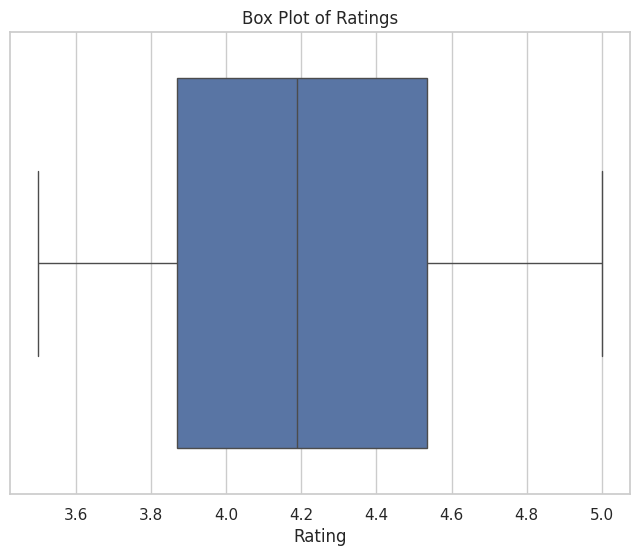

In [ ]:
# 3. Box Plot for Numerical Feature (e.g., 'Rating')
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', data=df)
plt.title('Box Plot of Ratings')
plt.show()

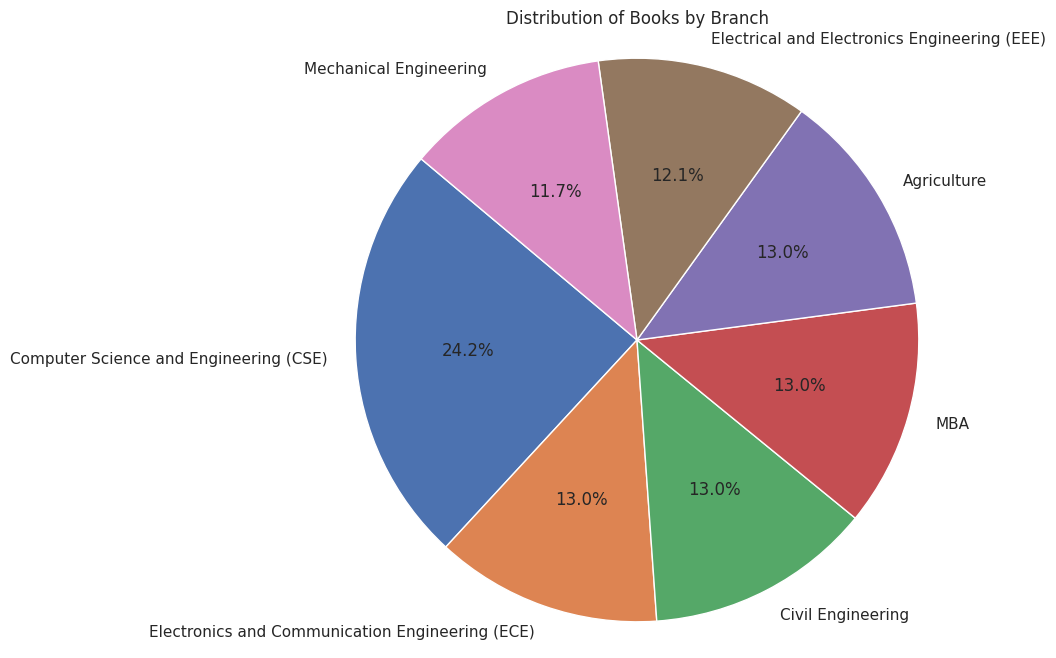

In [ ]:
# Count the number of books for each branch
branch_counts = df['Branch'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Books by Branch')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()

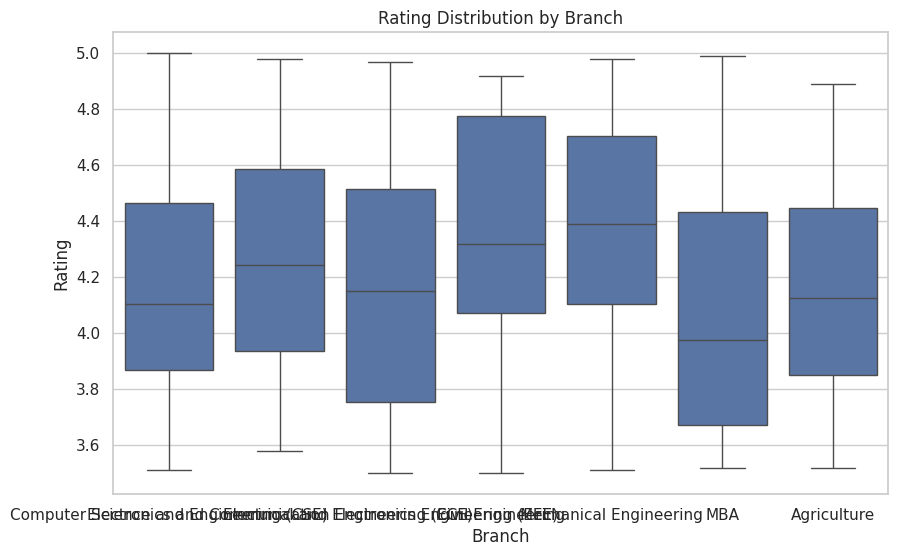

In [ ]:
# Box plot for Ratings by Branch
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='Rating', data=df)
plt.title('Rating Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Rating')
plt.show()

In [ ]:
from IPython.display import display, HTML

# Define your style
style = """
<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f5f5f5;
        color: #333;
    }
    h1 {
        color: #0066cc;
    }
    /* Add more styling as needed */
</style>
"""

# Display the style
display(HTML(style))

def login_screen():
    # Your login screen code here
    pass


**BOOK RECOMMENDATION SYSTEM ALGORITHM AND DEPLOYMENT**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from datetime import datetime
from google.colab import files
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import sys

# Custom styling
"""style =
<style>
.custom-header {
    background-color: #2b5797;
    color: white;
    padding: 20px;
    border-radius: 10px;
    margin: 10px 0;
    text-align: center;
    font-family: 'Arial', sans-serif;
}
.welcome-message {
    background-color: #4CAF50;
    color: white;
    padding: 15px;
    border-radius: 8px;
    margin: 10px 0;
    text-align: center;
}
.result-container {
    background-color: #f8f9fa;
    padding: 15px;
    border-radius: 8px;
    border: 1px solid #dee2e6;
    margin: 10px 0;
}
.book-card {
    background-color: white;
    padding: 10px;
    margin: 5px 0;
    border-radius: 5px;
    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
}
</style>"""


display(HTML(style))

def login_screen():
    clear_output(wait=True)
    display(HTML("<div class='custom-header'><h1>📚 Engineering Book Recommendation System</h1></div>"))

    username_input = widgets.Text(
        value='',
        placeholder='Enter your name',
        description='Username:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    login_button = widgets.Button(
        description='Login',
        button_style='success',
        layout=widgets.Layout(width='20%')
    )

    def on_login_click(b):
        if username_input.value.strip():
            initialize_system(username_input.value)

    login_button.on_click(on_login_click)
    display(username_input, login_button)

def initialize_system(username):
    clear_output(wait=True)

    # Display welcome header
    welcome_html = f"""
        <div class='custom-header'>
            <h1>📚 Smart Book Recommendation System</h1>
        </div>
        <div class='welcome-message'>
            <h2>Welcome, {username}! 👋</h2>
            <p>What would you like to explore today?</p>
        </div>
    """
    display(HTML(welcome_html))

    # Upload and process dataset
    #uploaded = files.upload()
    #filename = list(uploaded.keys())[0]

    # Load the dataset
    df = pd.read_csv("/content/cleaned_combined_books_dataset.csv")

    # Preprocess the data
    df['text'] = df['Book Title'] + ' ' + df['Course'] + ' ' + df['Branch'] + ' ' + df['Description']
    df['text'] = df['text'].fillna('')
    df['Published Date'] = pd.to_datetime(df['Published Date'])

    def get_recommendations(input_text, input_type, df, top_n=5):
        tfidf = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf.fit_transform(df['text'])

        input_tfidf = tfidf.transform([input_text])
        cosine_sim = linear_kernel(input_tfidf, tfidf_matrix)

        sim_scores = list(enumerate(cosine_sim[0]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        top_indices = [i[0] for i in sim_scores[:top_n]]
        return df.iloc[top_indices]

    def display_results(title, results):
        result_html = f"<div class='result-container'><h3>{title}</h3>"

        for _, row in results.iterrows():
            result_html += f"""
                <div class='book-card'>
                    <h4>{row['Book Title']}</h4>
                    <p><strong>Course:</strong> {row['Course']}</p>
                    <p><strong>Branch:</strong> {row['Branch']}</p>
                    <p><strong>Rating:</strong> {"⭐" * int(row['Rating'])}</p>
                    <p><strong>Published:</strong> {str(row['Published Date']).split()[0]}</p>
                </div>
            """

        result_html += "</div>"
        display(HTML(result_html))

    def recommend_by_branch(branch):
        clear_output(wait=True)
        display_header()
        recommendations = get_recommendations(branch, 'Branch', df)
        display_results(f"📚 Recommended Books for {branch}:", recommendations)
        display_navigation()

    def recommend_by_course(course):
        clear_output(wait=True)
        display_header()
        recommendations = get_recommendations(course, 'Course', df)
        display_results(f"📚 Recommended Books for {course}:", recommendations)
        display_navigation()

    def search_by_title(title):
        clear_output(wait=True)
        display_header()
        recommendations = get_recommendations(title, 'Book Title', df)
        if recommendations.empty:
            recommendations = df.sort_values('Rating', ascending=False).head(5)
        display_results(f"🔍 Search Results for '{title}':", recommendations)
        display_navigation()

    def get_recent_books():
        clear_output(wait=True)
        display_header()
        current_year = datetime.now().year
        recent_books = df[df['Published Date'].dt.year >= (current_year - 2)].sort_values('Published Date', ascending=False).head(10)
        display_results("📆 Recent Books:", recent_books)
        display_navigation()

    def exit_system(b):
        clear_output(wait=True)
        display(HTML("""
            <div class='custom-header'>
                <h2>👋 Thank you for using the Book Recommendation System!</h2>
                <p>Have a great day!</p>
            </div>
        """))

    def display_header():
        header_html = f"""
            <div class='custom-header'>
                <h1>📚 Engineering Book Recommendation System</h1>
                <p>Welcome, {username}!</p>
            </div>
        """
        display(HTML(header_html))

    def display_navigation():
        display(widgets.HBox([branch_dropdown, branch_button]))
        display(widgets.HBox([course_input, course_button]))
        display(widgets.HBox([title_input, title_button]))
        display(widgets.HBox([recent_button, exit_button]))

    # Create styled widgets
    branch_dropdown = widgets.Dropdown(
        options=df['Branch'].unique(),
        description='Branch:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    course_input = widgets.Text(
        value='',
        placeholder='Enter course name',
        description='Course:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    title_input = widgets.Text(
        value='',
        placeholder='Enter book title',
        description='Title:',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='50%')
    )

    # Create styled buttons
    branch_button = widgets.Button(
        description='🔍 Search by Branch',
        button_style='info',
        layout=widgets.Layout(width='20%')
    )

    course_button = widgets.Button(
        description='🔍 Search by Course',
        button_style='info',
        layout=widgets.Layout(width='20%')
    )

    title_button = widgets.Button(
        description='🔍 Search by Title',
        button_style='info',
        layout=widgets.Layout(width='20%')
    )

    recent_button = widgets.Button(
        description='📆 Recent Books',
        button_style='warning',
        layout=widgets.Layout(width='20%')
    )

    exit_button = widgets.Button(
        description='👋 Exit',
        button_style='danger',
        layout=widgets.Layout(width='20%')
    )

    # Set up button click events
    branch_button.on_click(lambda _: recommend_by_branch(branch_dropdown.value))
    course_button.on_click(lambda _: recommend_by_course(course_input.value))
    title_button.on_click(lambda _: search_by_title(title_input.value))
    recent_button.on_click(lambda _: get_recent_books())
    exit_button.on_click(exit_system)

    # Display initial layout
    display_navigation()

# Start the system
login_screen()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from datetime import datetime
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

# Load dataset
df = pd.read_csv("/content/cleaned_combined_books_dataset.csv")

# Preprocess the data
df['text'] = df['Book Title'] + ' ' + df['Course'] + ' ' + df['Branch'] + ' ' + df['Description']
df['text'] = df['text'].fillna('')
df['Published Date'] = pd.to_datetime(df['Published Date'])

def get_recommendations(input_text, df, top_n=5):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df['text'])
    input_tfidf = tfidf.transform([input_text])
    cosine_sim = linear_kernel(input_tfidf, tfidf_matrix)
    sim_scores = list(enumerate(cosine_sim[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[:top_n]]
    return df.iloc[top_indices]

def precision_at_k(recommended_df, k=5, rating_threshold=4.0):
    relevant_items = recommended_df[recommended_df['Rating'] >= rating_threshold]
    precision = len(relevant_items) / min(k, len(recommended_df))
    return precision

def evaluate_recommendation_system(df, input_texts, k=5):
    precisions = []
    for text in input_texts:
        recommended_df = get_recommendations(text, df, top_n=k)
        precision = precision_at_k(recommended_df, k)
        precisions.append(precision)
    avg_precision = np.mean(precisions)
    print(f"Average Precision@{k}: {avg_precision:.2f}")

# Example: Evaluating the recommendation system with sample input texts
input_texts = ['Math', 'Computer Science', 'Data Science', 'Mechanical Engineering']
evaluate_recommendation_system(df, input_texts)


Average Precision@5: 0.70


Precision@5 for 'Math': 0.60
Precision@5 for 'Computer Science': 0.60
Precision@5 for 'Data Science': 0.60
Precision@5 for 'Mechanical Engineering': 1.00
Average Precision@5: 0.70


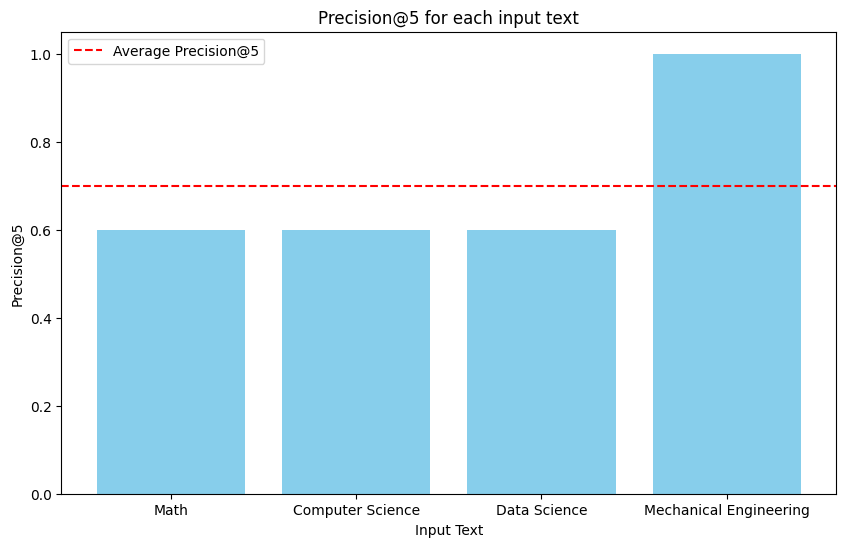

In [ ]:
import matplotlib.pyplot as plt

# Function to plot Precision@K for each input text and the average precision
def plot_precision(input_texts, precisions, k=5):
    plt.figure(figsize=(10, 6))
    plt.bar(input_texts, precisions, color='skyblue')
    plt.axhline(y=np.mean(precisions), color='r', linestyle='--', label=f'Average Precision@{k}')
    plt.xlabel('Input Text')
    plt.ylabel(f'Precision@{k}')
    plt.title(f'Precision@{k} for each input text')
    plt.legend()
    plt.show()

# Modified evaluation function to include plotting
def evaluate_and_plot(df, input_texts, k=5):
    precisions = []
    for text in input_texts:
        recommended_df = get_recommendations(text, df, top_n=k)
        precision = precision_at_k(recommended_df, k)
        precisions.append(precision)
    avg_precision = np.mean(precisions)

    # Displaying Precision@K values
    for idx, text in enumerate(input_texts):
        print(f"Precision@{k} for '{text}': {precisions[idx]:.2f}")
    print(f"Average Precision@{k}: {avg_precision:.2f}")

    # Plotting Precision@K for each input text
    plot_precision(input_texts, precisions, k)

# Example: Evaluating and plotting
evaluate_and_plot(df, input_texts)


Metrics for 'Math':
  Precision@5: 0.60
  Recall@5: 1.00
  F1-Score@5: 0.75

Metrics for 'Computer Science':
  Precision@5: 0.60
  Recall@5: 1.00
  F1-Score@5: 0.75

Metrics for 'Data Science':
  Precision@5: 0.60
  Recall@5: 1.00
  F1-Score@5: 0.75

Metrics for 'Mechanical Engineering':
  Precision@5: 1.00
  Recall@5: 1.00
  F1-Score@5: 1.00

Average Precision@5: 0.70
Average Recall@5: 1.00
Average F1-Score@5: 0.81


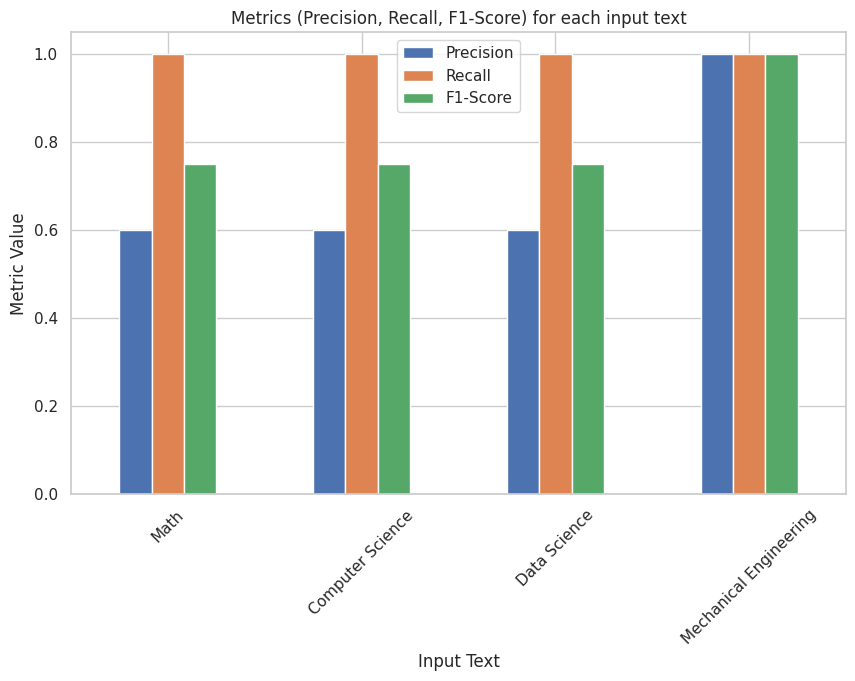

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1-score at K
def precision_at_k(recommended_df, k=5, rating_threshold=4.0):
    relevant_items = recommended_df[recommended_df['Rating'] >= rating_threshold]
    precision = len(relevant_items) / min(k, len(recommended_df))
    return precision

def recall_at_k(recommended_df, k=5, rating_threshold=4.0):
    relevant_items = recommended_df[recommended_df['Rating'] >= rating_threshold]
    recall = len(relevant_items) / sum(recommended_df['Rating'] >= rating_threshold)
    return recall

def f1_at_k(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Function to evaluate and plot metrics (Precision, Recall, F1-score)
def evaluate_and_plot(df, input_texts, k=5):
    precisions = []
    recalls = []
    f1_scores = []

    for text in input_texts:
        recommended_df = get_recommendations(text, df, top_n=k)
        precision = precision_at_k(recommended_df, k)
        recall = recall_at_k(recommended_df, k)
        f1 = f1_at_k(precision, recall)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)

    # Displaying individual metrics for each input text
    for idx, text in enumerate(input_texts):
        print(f"Metrics for '{text}':")
        print(f"  Precision@{k}: {precisions[idx]:.2f}")
        print(f"  Recall@{k}: {recalls[idx]:.2f}")
        print(f"  F1-Score@{k}: {f1_scores[idx]:.2f}")
        print()

    # Display average metrics
    print(f"Average Precision@{k}: {avg_precision:.2f}")
    print(f"Average Recall@{k}: {avg_recall:.2f}")
    print(f"Average F1-Score@{k}: {avg_f1:.2f}")

    # Plotting the metrics
    metrics_df = pd.DataFrame({
        'Input Text': input_texts,
        'Precision': precisions,
        'Recall': recalls,
        'F1-Score': f1_scores
    })

    metrics_df.set_index('Input Text', inplace=True)

    # Plotting the metrics for each input text
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Metrics (Precision, Recall, F1-Score) for each input text')
    plt.ylabel('Metric Value')
    plt.xlabel('Input Text')
    plt.xticks(rotation=45)
    plt.show()

# Example: Evaluating and plotting the metrics
evaluate_and_plot(df, input_texts)
